In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [104]:
df = pd.read_csv('sample_data/data_modified.csv').drop(columns=['Unnamed: 0'])
df

,AT,V,AP,RH,PE
0,0.372521,0.291815,0.771591,0.638204,0.569536
1,0.662040,0.669039,0.671863,0.449330,0.319338
2,0.093484,0.249822,0.476862,0.892493,0.904636
3,0.539660,0.568683,0.429349,0.684718,0.347285
4,0.255241,0.216014,0.404355,0.952547,0.710464
...,...,...,...,...,...
9418,0.420397,0.432918,0.522643,0.877212,0.526755
9419,0.322380,0.245907,0.761693,0.552547,0.653775
9420,0.835977,0.871352,0.495669,0.146381,0.123311
9421,0.642210,0.784520,0.518931,0.493700,0.205033


In [105]:
names = df.columns.values.tolist()[:-1]
n = len(names)
names

['AT', 'V', 'AP', 'RH']

In [106]:
train_percent = 0.6
valid_percent = 0.3
test_percent = 0.1
l = len(df)
df_train = df[:int(train_percent*l)].reset_index(drop=True)
df_valid = df[int(train_percent*l):int((train_percent+valid_percent)*l)].reset_index(drop=True)
df_test = df[int((train_percent+valid_percent)*l):].reset_index(drop=True)

_data_train_x = df_train[['AT', 'V', 'AP', 'RH']].to_numpy()
_data_train_y = df_train[['PE']].to_numpy()

_data_val_x = df_valid[['AT', 'V', 'AP', 'RH']].to_numpy()
_data_val_y = df_valid[['PE']].to_numpy()

_data_test_x = df_test[['AT', 'V', 'AP', 'RH']].to_numpy()
_data_test_y = df_test[['PE']].to_numpy()

_data_train_x = df_train[['AT', 'V', 'AP', 'RH']].to_numpy()
_data_train_y = df_train[['PE']].to_numpy()

_data_validation_x = df_valid[['AT', 'V', 'AP', 'RH']].to_numpy()
_data_validation_y = df_valid[['PE']].to_numpy()

In [107]:
# kernel_initializer = keras.initializers.RandomUniform(seed=1, minval=-8.66, maxval=8.66)
# bias_initializer = keras.initializers.RandomUniform(seed=1,minval=-8.66, maxval=8.66)
# kernel_initializer = keras.initializers.TruncatedNormal(seed=1, stddev=0.05, mean=0)
# bias_initializer = keras.initializers.TruncatedNormal(seed=1, stddev=0.05, mean=0)

kernel_initializer = keras.initializers.GlorotNormal(seed=1)
bias_initializer = keras.initializers.GlorotNormal(seed=1)

firstLayerAmountOfNeurons = 10
secondLayerAmountOfNeurons = 10
thirdLayerAmountOfNeurons = 5

learning_rate = 0.1
batch_size = len(df_train)

In [108]:
inputLayer = tf.keras.layers.Input(shape=(len(names),))

firstHiddenLayer = tf.keras.layers.Dense(
    firstLayerAmountOfNeurons,
    activation        ='tanh', 
    kernel_initializer=kernel_initializer, 
    bias_initializer  =bias_initializer,
    name              ='First_Hidden'
)(inputLayer)

secondHiddenLayer = tf.keras.layers.Dense(
    secondLayerAmountOfNeurons,
    activation        ='tanh', 
    kernel_initializer=kernel_initializer, 
    bias_initializer  =bias_initializer,
    name              ='Second_Hidden'
)(firstHiddenLayer)

thirdHiddenLayer = tf.keras.layers.Dense(
    thirdLayerAmountOfNeurons,
    activation        ='tanh', 
    kernel_initializer=kernel_initializer, 
    bias_initializer  =bias_initializer,
    name              ='Third_Hidden'
)(secondHiddenLayer)

outputLayer = tf.keras.layers.Dense(
    1, 
    activation='linear',
    name='Output'
)(thirdHiddenLayer)

model = keras.Model(inputs=inputLayer, outputs=outputLayer)

model.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=learning_rate
    ),
    loss='mse'
)

model.summary()
model.save('./models/model_sgd_1.h5')
model.save_weights('./weights/weight_1')

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 4)]               0         
                                                                 
 First_Hidden (Dense)        (None, 10)                50        
                                                                 
 Second_Hidden (Dense)       (None, 10)                110       
                                                                 
 Third_Hidden (Dense)        (None, 5)                 55        
                                                                 
 Output (Dense)              (None, 1)                 6         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [109]:
#@title SGD 
l_rates = [
    0.1,
][::-1]

amountOfEpochs = 100

errors = dict()

for lr in l_rates:
    errors[lr] = {
        'Train':[], 
        'Validation':[], 
        'Test': [], 
        'Epoch':[]
    }
    
    model.load_weights('./weights/weight_1')
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=lr, 
        ),
        loss='mse'
    )

    currentEpoch = 1

    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x, 
            y              =_data_train_y, 
            epochs         =1, 
            validation_data=(_data_validation_x, _data_validation_y),
            batch_size=batch_size
        )
        
        errors[lr]['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
        errors[lr]['Validation'].append(model.evaluate(_data_validation_x, _data_validation_y, batch_size=batch_size, verbose=0))
        errors[lr]['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
        errors[lr]['Epoch'     ].append(currentEpoch)
        
        currentEpoch += 1

1/1 [==============================] - 0s 69ms/step - loss: 0.0038 - val_loss: 0.0039


learning_rate: 	0.1
Train loss: 	0.0037567263934761286
Test loss: 	0.0036074102390557528



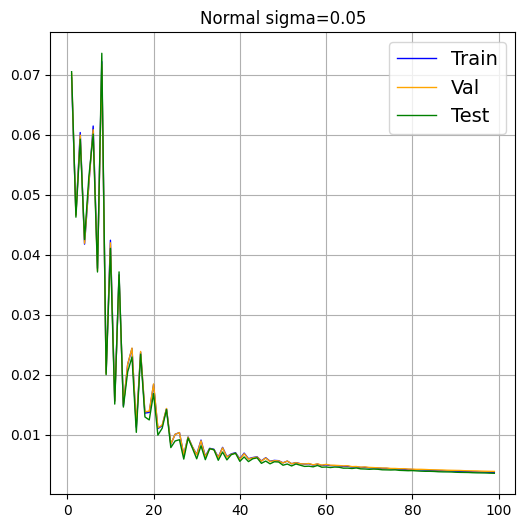

In [110]:
#@title plot
fig8, ax8 = plt.subplots(1, 1)
fig8.set_size_inches((6, 6))

for i in range(1):
    ax8.plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Train']),      label='Train',      linewidth=1, color="blue")
    ax8.plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Validation']), label='Val',        linewidth=1, color="orange")
    ax8.plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Test']),       label='Test',       linewidth=1, color="green")
    ax8.legend(fontsize=14)
    ax8.grid()
    ax8.set_title(f'Normal sigma=0.05')
    train_loss = np.array(errors[l_rates[i]]['Train'])[-1]
    test_loss = np.array(errors[l_rates[i]]['Test'])[-1]
    print(f'learning_rate: \t{l_rates[i]}')
    print(f'Train loss: \t{train_loss}')
    print(f'Test loss: \t{test_loss}\n')

#plt.savefig(f'./Graphs/GD_lr={l_rates[i]}_epochs={amountOfEpochs}_1.png', dpi=300)
model.save_weights('./weights/weight_GD_1')

In [113]:
def L1_norm(x: np.array):
    count = 1
    for r in x.shape:
        count *= r
    return np.sum(np.abs(x)) / count


def L2_norm(x: np.array):
    count = 1
    for r in x.shape:
        count *= r
    return np.sum(x * x) / count


class NormHistory(keras.callbacks.Callback):
    def __init__(self, norm: callable, count: int):
        super().__init__()
        self.weights = None
        self.norm = norm
        self.count = count

    def on_train_begin(self, logs=None):
        self.weights = list()
        for _ in range(self.count):
            self.weights.append(list())

    def on_epoch_begin(self, epoch, logs=None):
        if logs is None:
            logs = {}

        for i in range(self.count):
            self.weights[i].append(self.norm(self.model.layers[i].get_weights()[0]))

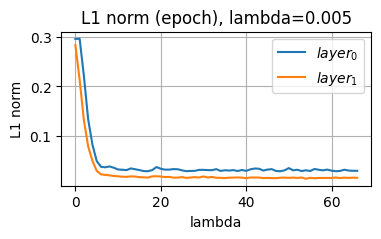

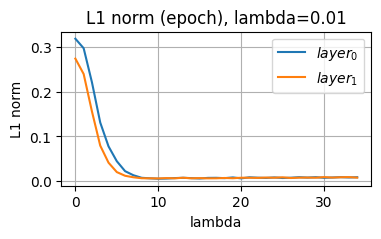

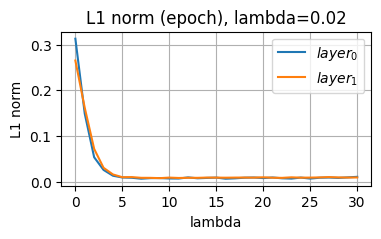

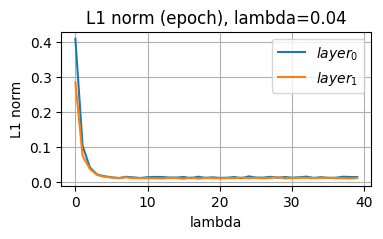

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: ignored

<Figure size 400x200 with 1 Axes>

<ipython-input-112-1a8b35e0cbce>:63: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(f'4.15/{name}_mse(lambda).png')


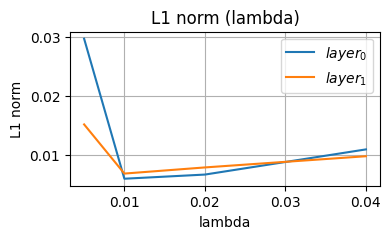

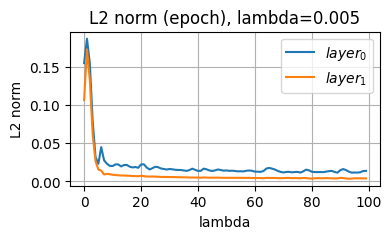

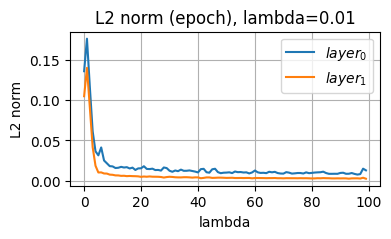

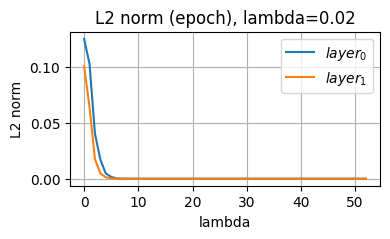

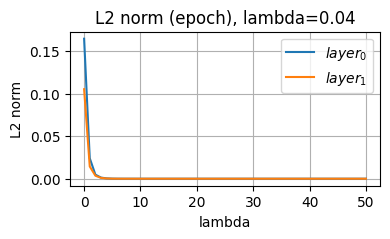

ValueError: ignored

<Figure size 400x200 with 1 Axes>

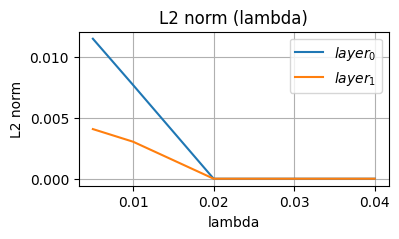

In [112]:
lds = [0.005, 0.01, 0.02, 0.04]

for regularizer, name, norm in zip([keras.regularizers.L1, keras.regularizers.L2], ['L1', 'L2'], [L1_norm, L2_norm]):
    train_errors = []
    test_errors = []
    weights0 = []
    weights1 = []
    for ld in lds:
        path = f'4.15/models/model_{name}_{ld}.h5'
        model = keras.Sequential(
            [keras.layers.Dense(10, input_dim=len(names), use_bias=True, activation='tanh',
                                kernel_regularizer=regularizer(ld)),
             keras.layers.Dense(10, use_bias=True, activation='tanh',
                                kernel_regularizer=regularizer(ld)),
             keras.layers.Dense(5, use_bias=True, activation='tanh',
                                kernel_regularizer=regularizer(ld)),
             keras.layers.Dense(1, use_bias=True)])

        model.compile(optimizer=keras.optimizers.Adam(0.1), loss=tf.losses.mse)
        norm_history = NormHistory(norm, 2)
        
        callbacks = [keras.callbacks.EarlyStopping(patience=20, monitor='val_loss'),
                    keras.callbacks.ModelCheckpoint(path, monitor='val_loss', save_best_only=True, mode='min',
                                                        save_weights_only=True),
                                                        norm_history]
        history = model.fit(_data_train_x, _data_train_y, epochs=100, batch_size=500,
                                validation_data=(_data_val_x, _data_val_y),
                                use_multiprocessing=True, workers=-1,
                                callbacks=callbacks, verbose=0)
        model.load_weights(path)
        
        train_pred = model.predict(_data_train_x, verbose=0).reshape(-1)
        test_pred = model.predict(_data_test_x, verbose=0).reshape(-1)

        train_errors.append(tf.losses.mse(_data_train_y, train_pred))
        test_errors.append(tf.losses.mse(_data_test_y, test_pred))

        weights0.append(norm(model.layers[0].get_weights()[0]))
        weights1.append(norm(model.layers[1].get_weights()[0]))

        # Норма от эпохи
        fig = plt.figure(figsize=(4, 2))
        plt.title(f'{name} norm (epoch), lambda={ld}')
        plt.plot(norm_history.weights[0], label='$layer_0$')
        plt.plot(norm_history.weights[1], label='$layer_1$')
        plt.xlabel('lambda')
        plt.ylabel(f'{name} norm')
        plt.grid()
        plt.legend()
        plt.show()
        fig.savefig(f'4.15/{name}_norm(epoch)_{ld}.png')

    # Ошибка от лямбды
    fig = plt.figure(figsize=(4, 2))
    plt.title(f'{name}')
    plt.plot(lds, train_errors, label='train mse')
    plt.plot(lds, test_errors, label='test mse')
    plt.xlabel('lambda')
    plt.ylabel('mse')
    plt.grid()
    plt.legend()
    plt.show()
    fig.savefig(f'4.15/{name}_mse(lambda).png')

    # Норма от лямбды
    fig = plt.figure(figsize=(4, 2))
    plt.title(f'{name} norm (lambda)')
    plt.plot(lds, weights0, label='$layer_0$')
    plt.plot(lds, weights1, label='$layer_1$')
    plt.xlabel('lambda')
    plt.ylabel(f'{name} norm')
    plt.grid()
    plt.legend()
    plt.show()
    fig.savefig(f'4.15/{name}_norm(lambda).png')

In [78]:
class WeightsAndLossHistory(keras.callbacks.Callback):
    def __init__(self, x_test, y_test):
        super().__init__()
        self.weights = None
        self.test_losses = None
        self.x_test = x_test
        self.y_test = y_test

    def on_train_begin(self, logs=None):
        self.weights = [list(), list(), list(), list(), list(), list()]
        self.test_losses = list()

    def on_epoch_begin(self, epoch, logs=None):
        if logs is None:
            logs = {}
        weights = self.model.layers[0].get_weights()
        for i in range(3):
            self.weights[i].append(weights[0][0][i])
        weights = self.model.layers[1].get_weights()
        for i in range(3):
            self.weights[i + 3].append(weights[0][0][i])
        self.test_losses.append(
            tf.losses.mse(self.y_test, self.model.predict(self.x_test, verbose=0).reshape(-1)).numpy())

# Метод инициализации Хавьера

In [79]:
# Метод инициализации Хавьера
kernel_initializer = keras.initializers.GlorotNormal(seed=1)
bias_initializer = keras.initializers.GlorotNormal(seed=1)

firstLayerAmountOfNeurons = 10
secondLayerAmountOfNeurons = 10
thirdLayerAmountOfNeurons = 5

learning_rate = 0.1
batch_size = len(df_train)

In [80]:
inputLayer = tf.keras.layers.Input(shape=(len(names),))

firstHiddenLayer = tf.keras.layers.Dense(
    firstLayerAmountOfNeurons,
    activation        ='tanh', 
    kernel_initializer=kernel_initializer, 
    bias_initializer  =bias_initializer,
    name              ='First_Hidden'
)(inputLayer)

secondHiddenLayer = tf.keras.layers.Dense(
    secondLayerAmountOfNeurons,
    activation        ='tanh', 
    kernel_initializer=kernel_initializer, 
    bias_initializer  =bias_initializer,
    name              ='Second_Hidden'
)(firstHiddenLayer)

thirdHiddenLayer = tf.keras.layers.Dense(
    thirdLayerAmountOfNeurons,
    activation        ='tanh', 
    kernel_initializer=kernel_initializer, 
    bias_initializer  =bias_initializer,
    name              ='Third_Hidden'
)(secondHiddenLayer)

outputLayer = tf.keras.layers.Dense(
    1, 
    activation='linear',
    name='Output'
)(thirdHiddenLayer)

model = keras.Model(inputs=inputLayer, outputs=outputLayer)

model.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=learning_rate
    ),
    loss='mse'
)

model.summary()
model.save('./models/model_sgd_1.h5')
model.save_weights('./weights/weight_1')

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 4)]               0         
                                                                 
 First_Hidden (Dense)        (None, 10)                50        
                                                                 
 Second_Hidden (Dense)       (None, 10)                110       
                                                                 
 Third_Hidden (Dense)        (None, 5)                 55        
                                                                 
 Output (Dense)              (None, 1)                 6         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 93ms/step - loss: 0.0082 - val_loss: 0.0047
learning_rate: 	0.1
Train loss: 	0.004676858428865671
Test loss: 	0.004362587351351976

1/1 [==============================] - 0s 80ms/step - loss: 0.0509 - val_loss: 0.0507
learning_rate: 	0.1
Train loss: 	0.05085674673318863
Test loss: 	0.04938805475831032

1/1 [==============================] - 0s 74ms/step - loss: 0.0509 - val_loss: 0.0507
learning_rate: 	0.1
Train loss: 	0.05085732042789459
Test loss: 	0.0494355782866478



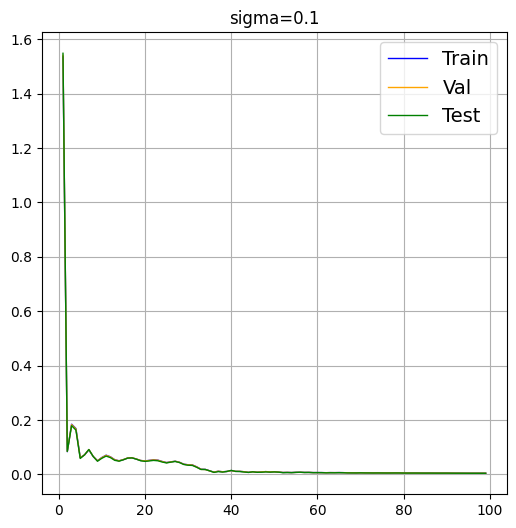

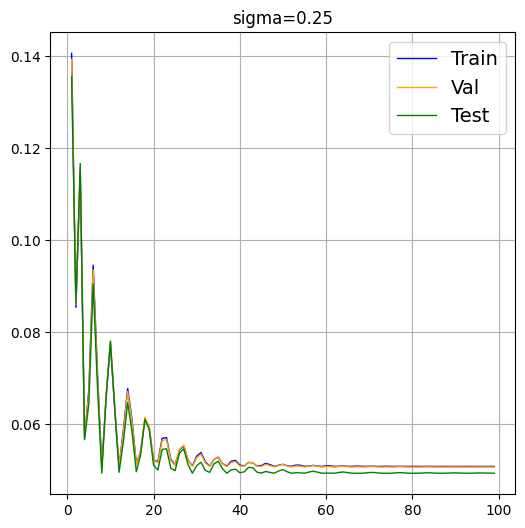

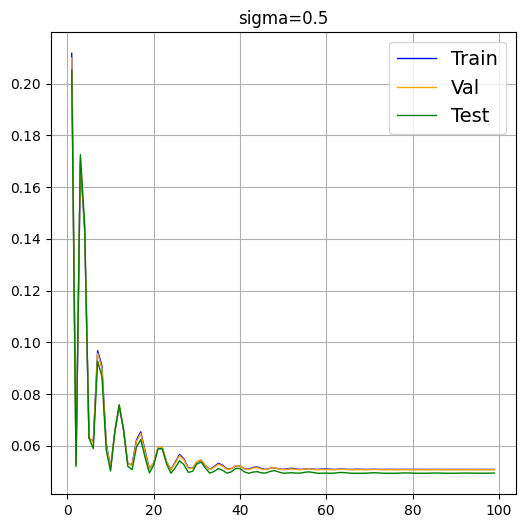

In [81]:
plt.ion()
for sigm in [0.1, 0.25, 0.5]:
    noise_x_train = _data_train_x + np.random.normal(0, sigm, (len(_data_train_x), len(names)))

    l_rates = [
        0.1,
    ][::-1]

    amountOfEpochs = 100

    errors = dict()

    for lr in l_rates:
        errors[lr] = {
            'Train':[], 
            'Validation':[], 
            'Test': [], 
            'Epoch':[]
        }
        
        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                learning_rate=lr, 
            ),
            loss='mse'
        )

        currentEpoch = 1

        while currentEpoch < amountOfEpochs:
            historyOfModel = model.fit(
                x              = noise_x_train, 
                y              =_data_train_y, 
                epochs         =1, 
                validation_data=(_data_val_x, _data_val_y),
                batch_size=batch_size
            )
            
            errors[lr]['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
            errors[lr]['Validation'].append(model.evaluate(_data_val_x, _data_val_y, batch_size=batch_size, verbose=0))
            errors[lr]['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
            errors[lr]['Epoch'     ].append(currentEpoch)
            
            currentEpoch += 1
    
    fig8, ax8 = plt.subplots(1, 1)
    fig8.set_size_inches((6, 6))

    for i in range(1):
        ax8.plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Train']),      label='Train',      linewidth=1, color="blue")
        ax8.plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Validation']), label='Val',        linewidth=1, color="orange")
        ax8.plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Test']),       label='Test',       linewidth=1, color="green")
        ax8.legend(fontsize=14)
        ax8.grid()
        ax8.set_title(f'sigma={sigm}')
        train_loss = np.array(errors[l_rates[i]]['Train'])[-1]
        test_loss = np.array(errors[l_rates[i]]['Test'])[-1]
        print(f'learning_rate: \t{l_rates[i]}')
        print(f'Train loss: \t{train_loss}')
        print(f'Test loss: \t{test_loss}\n')

In [82]:
#@title Зашумление градиентов
def add_gradient_noise(BaseOptimizer):
    K = keras.backend

    def _get_shape(x):
        if hasattr(x, 'dense_shape'):
            return x.dense_shape

        return K.shape(x)

    class NoisyOptimizer(BaseOptimizer):
        def __init__(self, noise_eta=0.3, noise_gamma=0.55, **kwargs):
            super(NoisyOptimizer, self).__init__(**kwargs)
            with K.name_scope(self.__class__.__name__):
                self.noise_eta = K.variable(noise_eta, name='noise_eta')
                self.noise_gamma = K.variable(noise_gamma, name='noise_gamma')

        def get_gradients(self, loss, params):
            grads = super(NoisyOptimizer, self).get_gradients(loss, params)

            # Add decayed gaussian noise
            t = K.cast(self.iterations, K.dtype(grads[0]))
            variance = self.noise_eta / ((1 + t) ** self.noise_gamma)

            grads = [
                grad + K.random_normal(
                    _get_shape(grad),
                    mean=0.0,
                    stddev=K.sqrt(variance),
                    dtype=K.dtype(grads[0])
                )
                for grad in grads
            ]

            return grads

        def get_config(self):
            config = {'noise_eta': float(K.get_value(self.noise_eta)),
                      'noise_gamma': float(K.get_value(self.noise_gamma))}
            base_config = super(NoisyOptimizer, self).get_config()
            return dict(list(base_config.items()) + list(config.items()))

    NoisyOptimizer.__name__ = 'Noisy{}'.format(BaseOptimizer.__name__)

    return NoisyOptimizer

1/1 [==============================] - 0s 65ms/step - loss: 0.0509 - val_loss: 0.0507
learning_rate: 	0.1
Train loss: 	0.050853658467531204
Test loss: 	0.04940440133213997

1/1 [==============================] - 0s 75ms/step - loss: 0.0509 - val_loss: 0.0507
learning_rate: 	0.1
Train loss: 	0.05085369199514389
Test loss: 	0.049411967396736145

1/1 [==============================] - 0s 62ms/step - loss: 0.0378 - val_loss: 0.0233
learning_rate: 	0.1
Train loss: 	0.023364584892988205
Test loss: 	0.022277895361185074



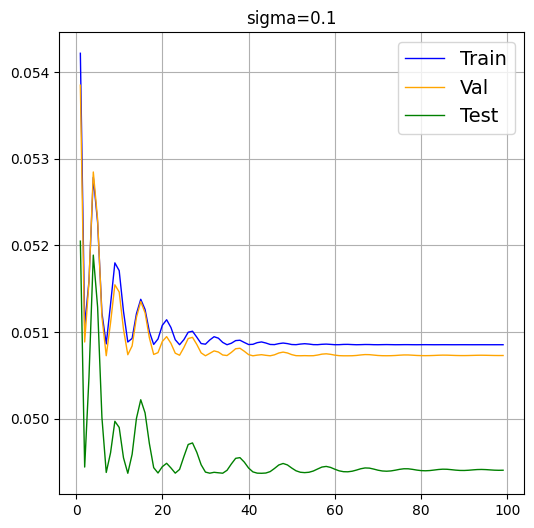

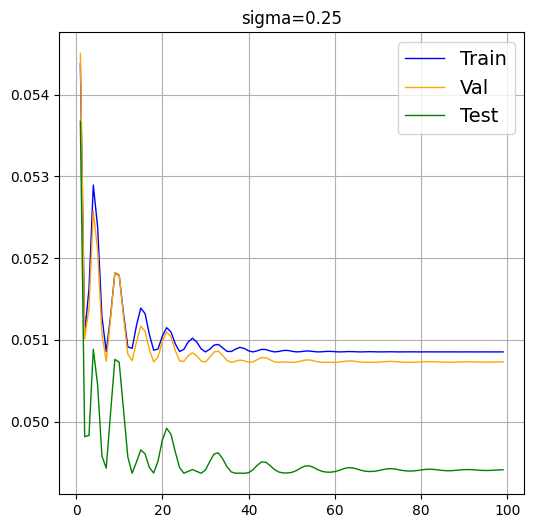

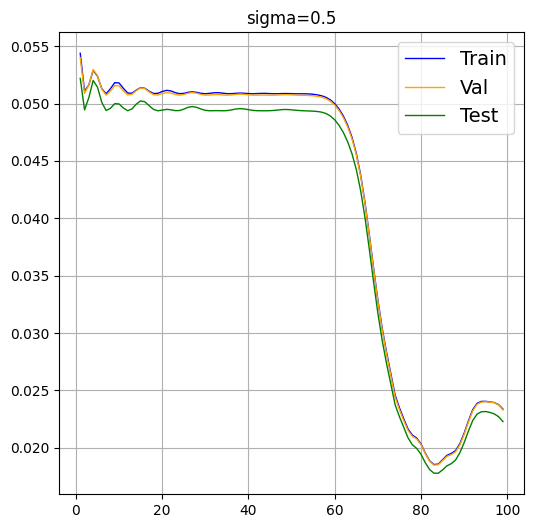

In [83]:
plt.ion()
NoisyAdam = add_gradient_noise(tf.optimizers.Adam)

for sigm in [0.1, 0.25, 0.5]:
    noise_x_train = _data_train_x + np.random.normal(0, sigm, (len(_data_train_x), len(names)))

    l_rates = [
        0.1,
    ][::-1]

    amountOfEpochs = 100

    errors = dict()

    for lr in l_rates:
        errors[lr] = {
            'Train':[], 
            'Validation':[], 
            'Test': [], 
            'Epoch':[]
        }
        
        model.compile(
            optimizer=NoisyAdam(learning_rate=0.01, noise_eta=sigm**2, noise_gamma=0.01),
            loss='mse'
        )

        currentEpoch = 1

        while currentEpoch < amountOfEpochs:
            historyOfModel = model.fit(
                x              = noise_x_train, 
                y              =_data_train_y, 
                epochs         =1, 
                validation_data=(_data_val_x, _data_val_y),
                batch_size=batch_size
            )
            
            errors[lr]['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
            errors[lr]['Validation'].append(model.evaluate(_data_val_x, _data_val_y, batch_size=batch_size, verbose=0))
            errors[lr]['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
            errors[lr]['Epoch'     ].append(currentEpoch)
            
            currentEpoch += 1
    
    fig8, ax8 = plt.subplots(1, 1)
    fig8.set_size_inches((6, 6))

    for i in range(1):
        ax8.plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Train']),      label='Train',      linewidth=1, color="blue")
        ax8.plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Validation']), label='Val',        linewidth=1, color="orange")
        ax8.plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Test']),       label='Test',       linewidth=1, color="green")
        ax8.legend(fontsize=14)
        ax8.grid()
        ax8.set_title(f'sigma={sigm}')
        train_loss = np.array(errors[l_rates[i]]['Train'])[-1]
        test_loss = np.array(errors[l_rates[i]]['Test'])[-1]
        print(f'learning_rate: \t{l_rates[i]}')
        print(f'Train loss: \t{train_loss}')
        print(f'Test loss: \t{test_loss}\n')

# Метод инициализации Хавьера

In [84]:
# Метод инициализации Хавьера
kernel_initializer = keras.initializers.GlorotNormal(seed=1)
bias_initializer = keras.initializers.GlorotNormal(seed=1)

firstLayerAmountOfNeurons = 10
secondLayerAmountOfNeurons = 10
thirdLayerAmountOfNeurons = 5
learning_rate = 0.1
batch_size = len(df_train)

In [86]:
inputLayer = tf.keras.layers.Input(shape=(len(names),))

firstHiddenLayer = tf.keras.layers.Dense(
    firstLayerAmountOfNeurons,
    activation        ='tanh', 
    kernel_initializer=kernel_initializer, 
    bias_initializer  =bias_initializer,
    name              ='First_Hidden'
)(inputLayer)

secondHiddenLayer = tf.keras.layers.Dense(
    secondLayerAmountOfNeurons,
    activation        ='tanh', 
    kernel_initializer=kernel_initializer, 
    bias_initializer  =bias_initializer,
    name              ='Second_Hidden'
)(firstHiddenLayer)

thirdHiddenLayer = tf.keras.layers.Dense(
    thirdLayerAmountOfNeurons,
    activation        ='tanh', 
    kernel_initializer=kernel_initializer, 
    bias_initializer  =bias_initializer,
    name              ='Third_Hidden'
)(secondHiddenLayer)

outputLayer = tf.keras.layers.Dense(
    1, 
    activation='linear',
    name='Output'
)(thirdHiddenLayer)

model = keras.Model(inputs=inputLayer, outputs=outputLayer)

model.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=learning_rate
    ),
    loss='mse'
)

model.summary()
model.save('./models/model_sgd_1.h5')
model.save_weights('./weights/weight_1')

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 4)]               0         
                                                                 
 First_Hidden (Dense)        (None, 10)                50        
                                                                 
 Second_Hidden (Dense)       (None, 10)                110       
                                                                 
 Third_Hidden (Dense)        (None, 5)                 55        
                                                                 
 Output (Dense)              (None, 1)                 6         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [87]:
l_rates = [
    0.1,
][::-1]

amountOfEpochs = 100

errors = dict()

for lr in l_rates:
    errors[lr] = {
        'Train':[], 
        'Validation':[], 
        'Test': [], 
        'Epoch':[]
    }
    
    model.load_weights('./weights/weight_1')
    model.compile(
        optimizer=tf.keras.optimizers.SGD(
            learning_rate=lr, 
        ),
        loss='mse'
    )

    currentEpoch = 1

    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x, 
            y              =_data_train_y, 
            epochs         =1, 
            validation_data=(_data_val_x, _data_val_y),
            batch_size=batch_size
        )
        
        errors[lr]['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
        errors[lr]['Validation'].append(model.evaluate(_data_val_x, _data_val_y, batch_size=batch_size, verbose=0))
        errors[lr]['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
        errors[lr]['Epoch'     ].append(currentEpoch)
        
        currentEpoch += 1

1/1 [==============================] - 0s 68ms/step - loss: 0.0179 - val_loss: 0.0174


In [88]:
train_pred = model.predict(_data_train_x, verbose=0).reshape(-1)
test_pred = model.predict(_data_test_x, verbose=0).reshape(-1)

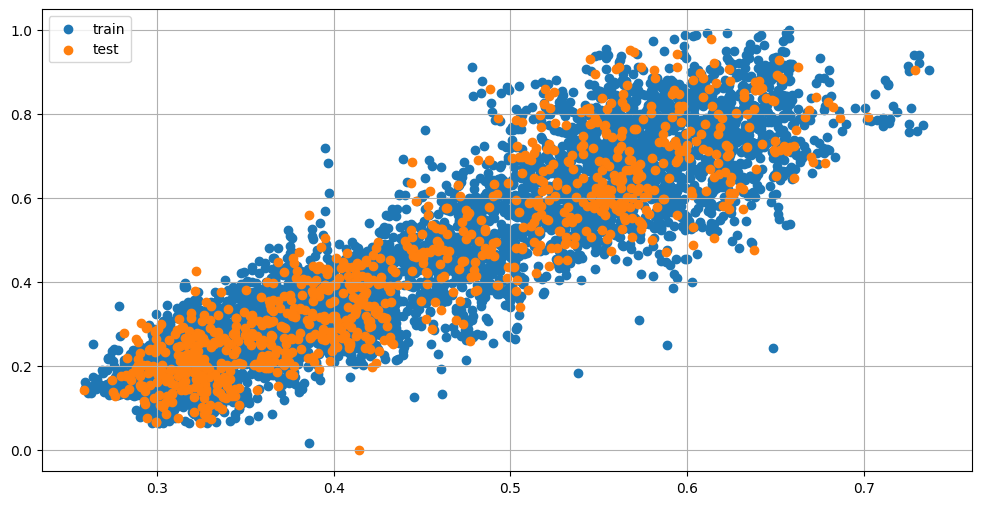

In [89]:
plt.figure(figsize=(12, 6))
plt.scatter(train_pred, _data_train_y,label='train')
plt.scatter(test_pred, _data_test_y, label='test')

plt.grid()
plt.legend()
plt.show()

y = y_pred * 1.8312475681304932


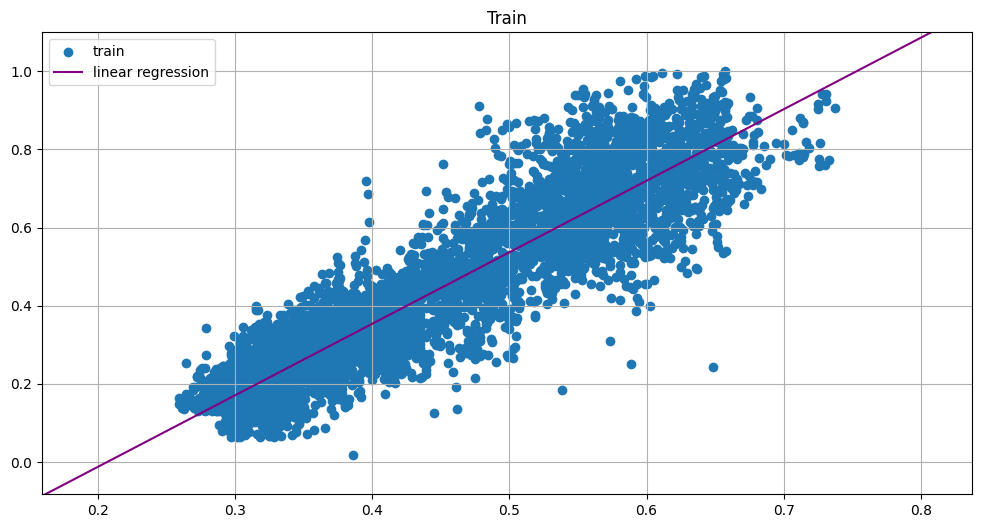

In [99]:
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression()

values = np.linspace(_data_train_y.min(), _data_train_y.max())

lin_regr.fit(train_pred.reshape(-1,1), _data_train_y)
lin_preds = lin_regr.predict(values.reshape(-1, 1)).reshape(-1)

plt.figure(figsize=(12, 6))
plt.scatter(train_pred, _data_train_y,label='train')
print(f'y = y_pred * {lin_regr.coef_[0][0]}')
plt.plot(values, lin_preds, color='purple', label='linear regression')
plt.title('Train')
plt.grid()
plt.xlim([train_pred.min()-0.1, train_pred.max()+0.1])
plt.ylim([_data_train_y.min()-0.1, _data_train_y.max()+0.1])
plt.legend()
plt.show()

y = y_pred * 1.8328111171722412


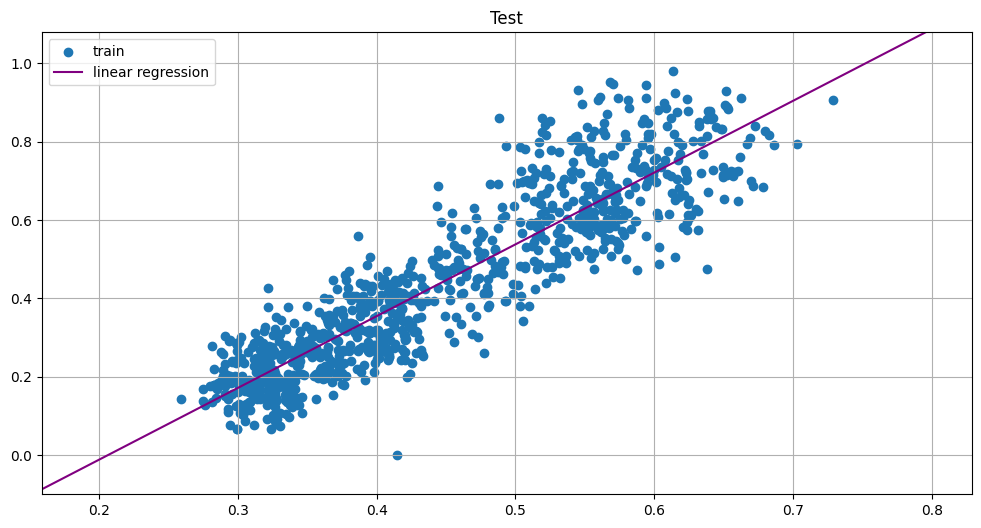

In [100]:
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression()

values = np.linspace(_data_test_y.min(), _data_test_y.max())

lin_regr.fit(test_pred.reshape(-1,1), _data_test_y)
lin_preds = lin_regr.predict(values.reshape(-1, 1)).reshape(-1)

plt.figure(figsize=(12, 6))
plt.scatter(test_pred, _data_test_y,label='train')
print(f'y = y_pred * {lin_regr.coef_[0][0]}')
plt.plot(values, lin_preds, color='purple', label='linear regression')
plt.title('Test')
plt.grid()
plt.xlim([test_pred.min()-0.1, test_pred.max()+0.1])
plt.ylim([_data_test_y.min()-0.1, _data_test_y.max()+0.1])
plt.legend()
plt.show()

In [92]:
from sklearn.metrics import r2_score
print(f'Train R^2 = {r2_score(_data_train_y, train_pred):.3f}')
print(f'Test R^2 = {r2_score(_data_test_y, test_pred):.3f}')

Train R^2 = 0.659
Test R^2 = 0.648


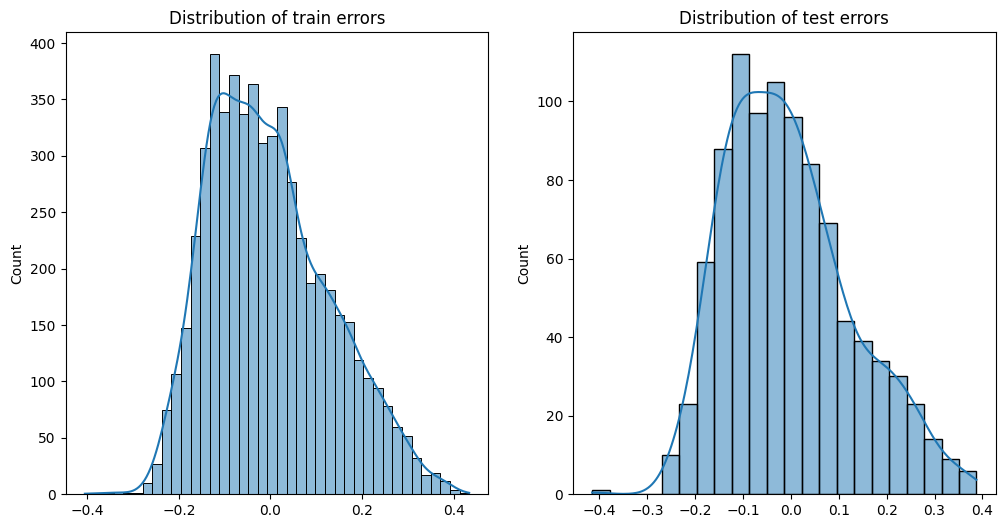

In [93]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)
sns.histplot(_data_train_y.reshape(-1) - train_pred,kde=True,ax=ax[0])
sns.histplot(_data_test_y.reshape(-1) - test_pred,kde=True,ax=ax[1])
ax[0].set_title('Distribution of train errors')
ax[1].set_title('Distribution of test errors')
plt.show()

In [94]:
weights = np.zeros((len(names), 1))


layer_w = model.layers[1].get_weights()[0]
print(layer_w.shape)
for i in range(len(names)):
    weights[i][0] += np.sum(layer_w[i])
print(list(zip(names, weights.reshape(-1))))

(4, 10)
[('AT', -1.205590009689331), ('V', -0.12788176536560059), ('AP', 1.2747869491577148), ('RH', -1.9544767141342163)]


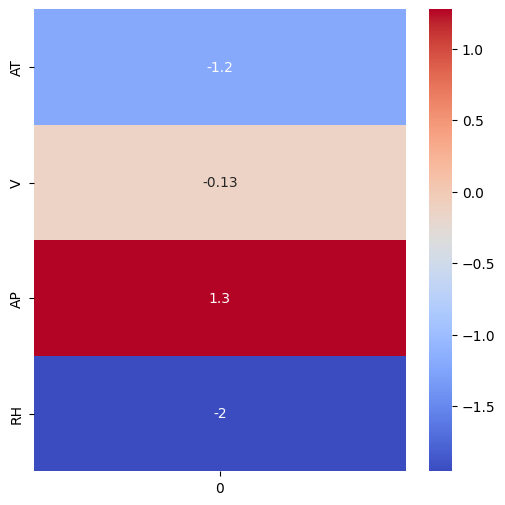

In [95]:
fig, ax = plt.subplots()
fig.set_figwidth(6)
fig.set_figheight(6)
sns.heatmap(weights, yticklabels=names, cmap='coolwarm', ax=ax, annot=True)
plt.show()